In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_files

In [4]:
config = get_config.read_yaml()

In [5]:
ticker = config['data'][config['data']['selected_tickers']][0]
ticker

'ADANIENT.NS'

In [6]:
data = read_files.read_raw_training_data(ticker)
data

Reading Raw Training data: ADANIENT !
Successfully read: ADANIENT !


,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2014-12-16,63.500015,64.271148,62.700048,63.435150,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094


In [7]:
ticker

'ADANIENT.NS'

In [8]:
cols = [col for col in data.columns]
cols

['Close',
 'High',
 'Low',
 'Open',
 'Volume',
 'Returns',
 'B&H Returns',
 'B&H Max',
 'B&H Drawdown',
 'B&H Drawdown %']

In [9]:
data['Returns'] = np.log(data.Close.div(data.Close.shift(1)))
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2014-12-16,63.500015,64.271148,62.700048,63.435150,7197622,NaN,0.991114,0.991114,0.000000,0.000000
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094


In [10]:
data.dropna(inplace = True)
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000
2014-12-23,63.824322,66.058461,63.420737,65.734155,5658813,-0.028278,0.996175,1.024747,0.028571,2.788148
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094


In [11]:
data['Cumm. Returns'] = data['Returns'].cumsum().apply(np.exp)
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Cumm. Returns
Date,,,,,,,,,,,
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,0.994098
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,1.011690
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,1.026444
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,1.033935
2014-12-23,63.824322,66.058461,63.420737,65.734155,5658813,-0.028278,0.996175,1.024747,0.028571,2.788148,1.005107
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795,44.185552
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259,45.083943
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094,44.736233


In [12]:
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

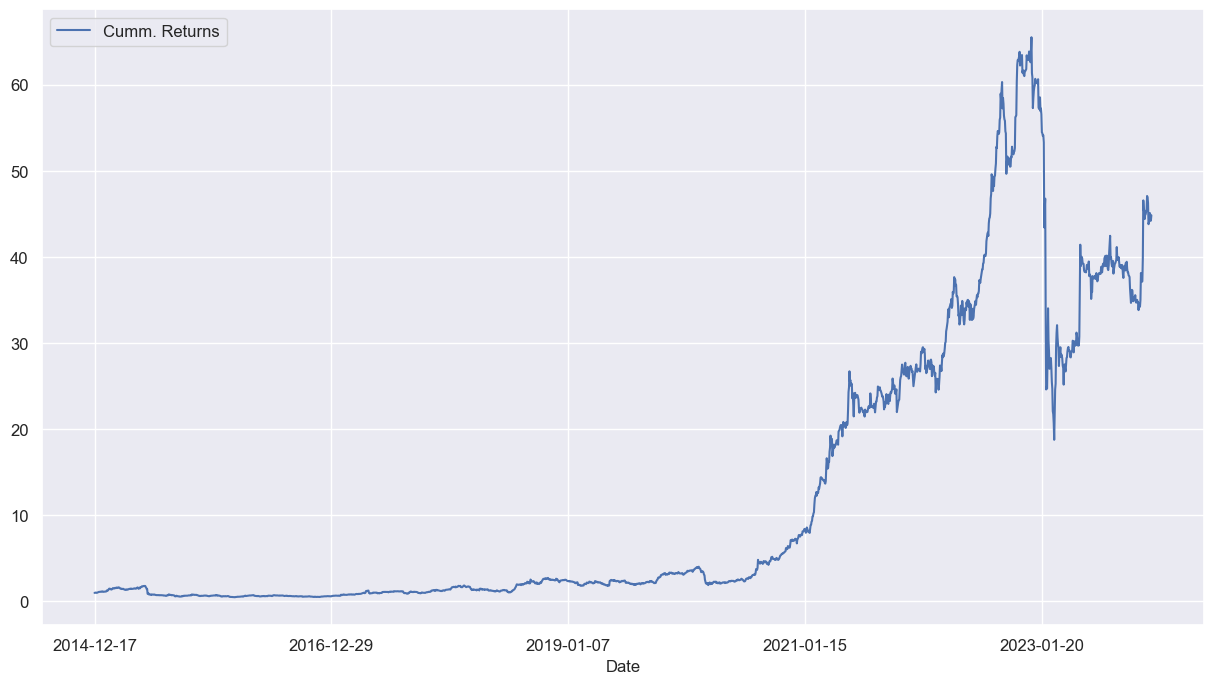

In [13]:
plot_df(data['Cumm. Returns'])

In [14]:
data['Cumm. Max'] = data['Cumm. Returns'].cummax()
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Cumm. Returns,Cumm. Max
Date,,,,,,,,,,,,
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,0.994098,0.994098
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,1.011690,1.011690
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,1.026444,1.026444
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,1.033935,1.033935
2014-12-23,63.824322,66.058461,63.420737,65.734155,5658813,-0.028278,0.996175,1.024747,0.028571,2.788148,1.005107,1.033935
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795,44.185552,65.502576
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259,45.083943,65.502576
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094,44.736233,65.502576


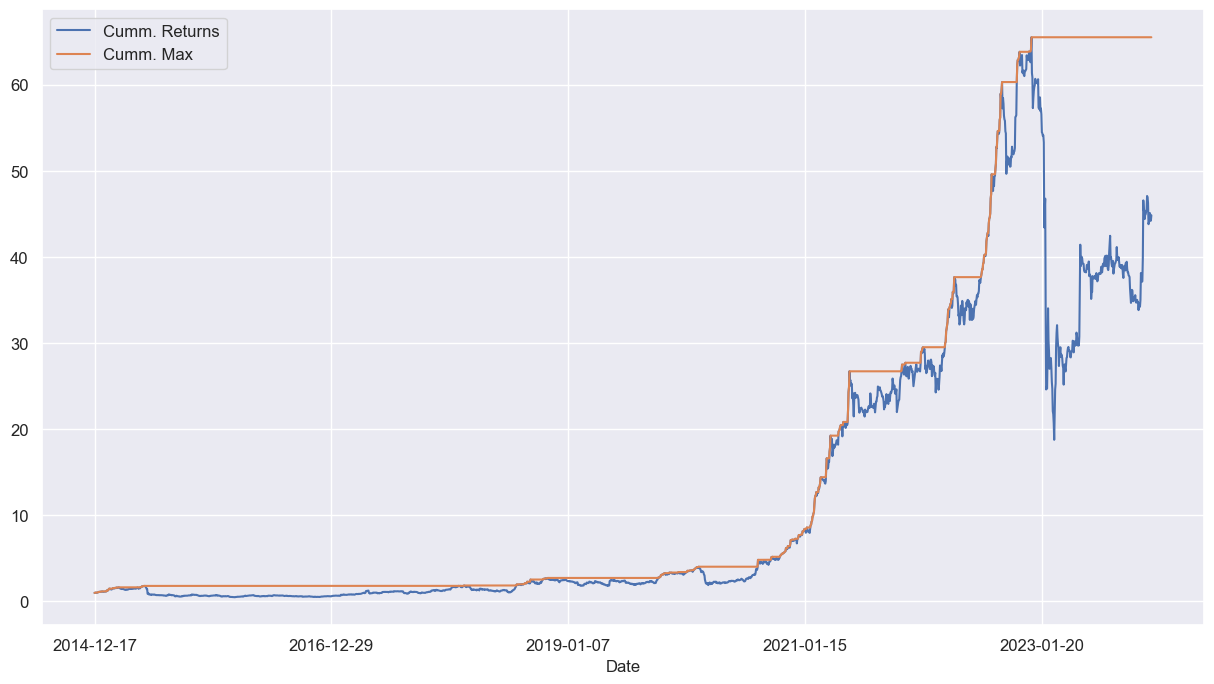

In [15]:
plot_df(data.loc[:, ['Cumm. Returns', 'Cumm. Max']])

In [16]:
data['Drawdown'] = data['Cumm. Max'] - data['Cumm. Returns']
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Cumm. Returns,Cumm. Max,Drawdown
Date,,,,,,,,,,,,,
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,0.994098,0.994098,0.000000
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,1.011690,1.011690,0.000000
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,1.026444,1.026444,0.000000
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,1.033935,1.033935,0.000000
2014-12-23,63.824322,66.058461,63.420737,65.734155,5658813,-0.028278,0.996175,1.024747,0.028571,2.788148,1.005107,1.033935,0.028828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795,44.185552,65.502576,21.317024
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259,45.083943,65.502576,20.418633
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094,44.736233,65.502576,20.766343


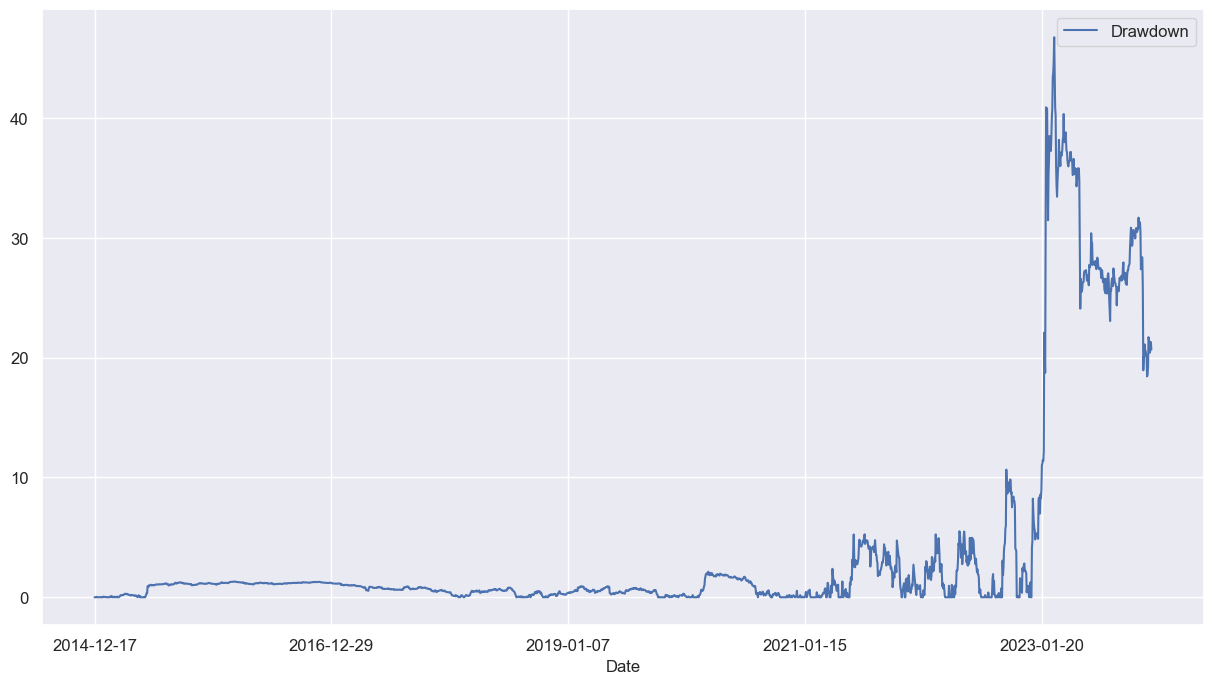

In [17]:
plot_df(data.loc[:, ['Drawdown']])

In [18]:
data['Drawdown %'] = ((data['Cumm. Max'] - data['Cumm. Returns']) / data['Cumm. Max']) * 100
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Cumm. Returns,Cumm. Max,Drawdown,Drawdown %
Date,,,,,,,,,,,,,,
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,0.994098,0.994098,0.000000,0.000000
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,1.011690,1.011690,0.000000,0.000000
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,1.026444,1.026444,0.000000,0.000000
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,1.033935,1.033935,0.000000,0.000000
2014-12-23,63.824322,66.058461,63.420737,65.734155,5658813,-0.028278,0.996175,1.024747,0.028571,2.788148,1.005107,1.033935,0.028828,2.788148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795,44.185552,65.502576,21.317024,32.543795
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259,45.083943,65.502576,20.418633,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094,44.736233,65.502576,20.766343,31.703094


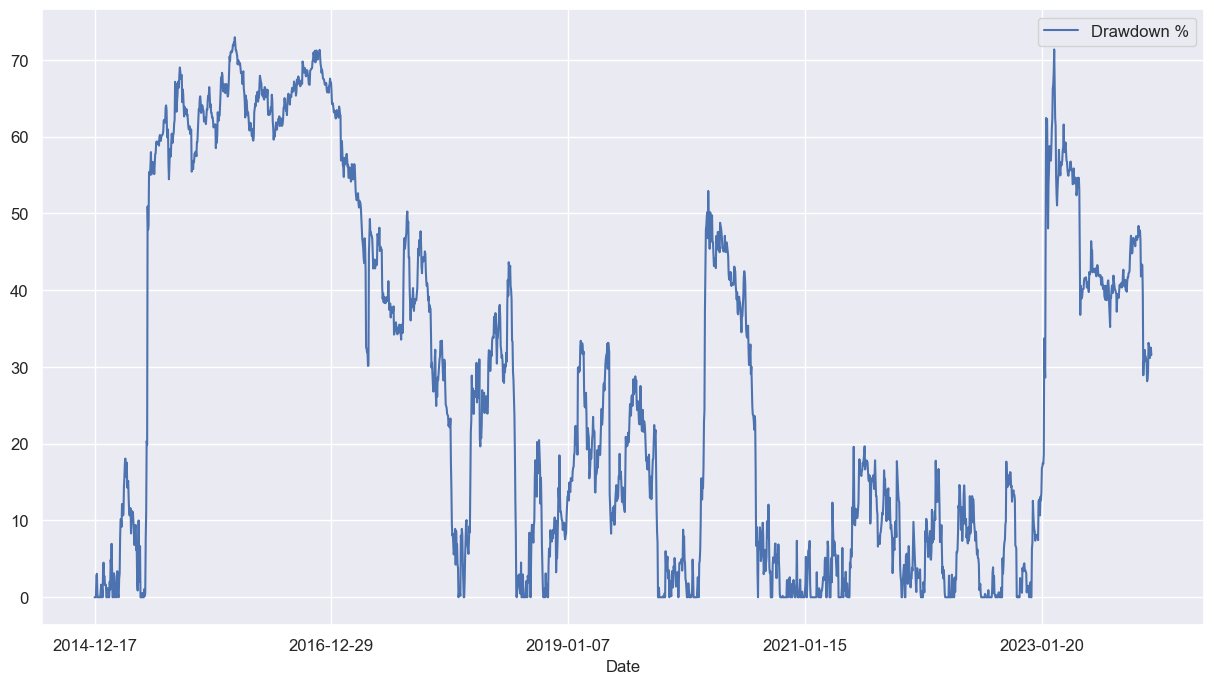

In [19]:
plot_df(data.loc[:, ['Drawdown %']])

In [20]:
data['Signal'] = np.where(data['Close']>data['Open'], -1, 1)
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Cumm. Returns,Cumm. Max,Drawdown,Drawdown %,Signal
Date,,,,,,,,,,,,,,,
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,0.994098,0.994098,0.000000,0.000000,1
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,1.011690,1.011690,0.000000,0.000000,-1
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,1.026444,1.026444,0.000000,0.000000,-1
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,1.033935,1.033935,0.000000,0.000000,-1
2014-12-23,63.824322,66.058461,63.420737,65.734155,5658813,-0.028278,0.996175,1.024747,0.028571,2.788148,1.005107,1.033935,0.028828,2.788148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795,44.185552,65.502576,21.317024,32.543795,1
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259,45.083943,65.502576,20.418633,31.172259,-1
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094,44.736233,65.502576,20.766343,31.703094,1


In [21]:
data['Position'] = data['Signal'].shift(1) * data['Returns']
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Cumm. Returns,Cumm. Max,Drawdown,Drawdown %,Signal,Position
Date,,,,,,,,,,,,,,,,
2014-12-17,63.125252,63.932429,61.546942,63.146876,10603088,-0.005919,0.985264,0.991114,0.005849,0.590179,0.994098,0.994098,0.000000,0.000000,1,NaN
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,1.011690,1.011690,0.000000,0.000000,-1,0.017541
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,1.026444,1.026444,0.000000,0.000000,-1,-0.014478
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,1.033935,1.033935,0.000000,0.000000,-1,-0.007271
2014-12-23,63.824322,66.058461,63.420737,65.734155,5658813,-0.028278,0.996175,1.024747,0.028571,2.788148,1.005107,1.033935,0.028828,2.788148,1,0.028278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795,44.185552,65.502576,21.317024,32.543795,1,-0.003067
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259,45.083943,65.502576,20.418633,31.172259,-1,0.020128
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094,44.736233,65.502576,20.766343,31.703094,1,0.007742


In [22]:
data.dropna(inplace = True)
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %,Cumm. Returns,Cumm. Max,Drawdown,Drawdown %,Signal,Position
Date,,,,,,,,,,,,,,,,
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000,1.011690,1.011690,0.000000,0.000000,-1,0.017541
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000,1.026444,1.026444,0.000000,0.000000,-1,-0.014478
2014-12-22,65.654877,66.231427,65.373805,65.373805,5039463,0.007271,1.024747,1.024747,0.000000,0.000000,1.033935,1.033935,0.000000,0.000000,-1,-0.007271
2014-12-23,63.824322,66.058461,63.420737,65.734155,5658813,-0.028278,0.996175,1.024747,0.028571,2.788148,1.005107,1.033935,0.028828,2.788148,1,0.028278
2014-12-24,63.651360,64.422499,63.204533,63.910807,10042919,-0.002714,0.993476,1.024747,0.031271,3.051589,1.002383,1.033935,0.031551,3.051589,1,-0.002714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783203,2844.997328,2788.848501,2813.376110,1513956,0.003067,43.792903,64.920496,21.127593,32.543795,44.185552,65.502576,21.317024,32.543795,1,-0.003067
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683311,64.920496,20.237185,31.172259,45.083943,65.502576,20.418633,31.172259,-1,0.020128
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338690,64.920496,20.581806,31.703094,44.736233,65.502576,20.766343,31.703094,1,0.007742


In [23]:
np.exp(data['Position'].sum())

np.float64(0.039306357740291)